In [1]:
import sys
sys.path.insert(0, "/Users/rstiskalek/Projects/candel")

from os.path import join, basename

import numpy as np
import matplotlib.pyplot as plt
from h5py import File
import seaborn as sns
import scienceplots

import candel
from candel import plot_corner_from_hdf5
from utils import * 


%matplotlib inline
%load_ext autoreload
%autoreload 2


COLS = ["#87193d", "#1e42b9", "#d42a29", "#05dd6b", "#ee35d5"]

In [3]:
config_path = "/Users/rstiskalek/Projects/CANDEL/scripts/runs/config.toml"
config = candel.load_config(config_path, )
root = join("/Users/rstiskalek/Projects/CANDEL/", "results", "S8")

## Posterior summary

In [9]:
fname = "precomputed_los_Carrick2015_CF4_W1_MNR_linear_from_beta_stochastic_eta_sampled.hdf5"

fname = join(root, fname)

with File(fname, "r") as f:
    grp = f["samples"]
    print(f"keys: {list(grp.keys())}")
    keys = ["beta", ]

    samples = {key: grp[key][...] for key in keys}

keys_read = ["beta"]
# keys_read = ['M_dipole_b', 'M_dipole_ell', 'M_dipole_mag']
# keys_read = ['Vext_b', 'Vext_ell', 'Vext_mag']

for key in keys_read:
    low, med, high = np.percentile(samples[key], [16, 50, 84])
    low = med - low
    high = high - med
    print(f"{key}: {med:.3f} +{high:.3f} -{low:.3f}")


# a_TFR_dipole_mag: 0.073 +0.024 -0.026

keys: ['R_dist_emp', 'Vext', 'Vext_b', 'Vext_ell', 'Vext_mag', 'a_TFR', 'b1', 'b_TFR', 'beta', 'c_TFR', 'eta_latent', 'eta_prior_mean', 'eta_prior_std', 'n_dist_emp', 'p_dist_emp', 'sigma_int', 'sigma_v']
beta: 0.451 +0.013 -0.012


In [7]:
!ls /Users/rstiskalek/Projects/CANDEL/results/S8/*.hdf5

/Users/rstiskalek/Projects/CANDEL/results/S8/precomputed_los_Carrick2015_CF4_W1_MNR_linear_from_beta_stochastic_eta_sampled.hdf5
/Users/rstiskalek/Projects/CANDEL/results/S8/precomputed_los_Carrick2015_CF4_i_MNR_linear_from_beta_stochastic_eta_sampled.hdf5
/Users/rstiskalek/Projects/CANDEL/results/S8/precomputed_los_Carrick2015_PantheonPlus_MNR_linear_from_beta_stochastic.hdf5


### Playground

precomputed_los_Carrick2015_CF4_W1_MNR_linear_from_beta_stochastic_eta_sampled.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v


precomputed_los_Carrick2015_CF4_i_MNR_linear_from_beta_stochastic_eta_sampled.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v
precomputed_los_Carrick2015_PantheonPlus_MNR_linear_from_beta_stochastic.hdf5: M, R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, b1, beta, n_dist_emp, p_dist_emp, r_latent, sigma_int, sigma_v
Removed no burn in
Removed no burn in
Removed no burn in


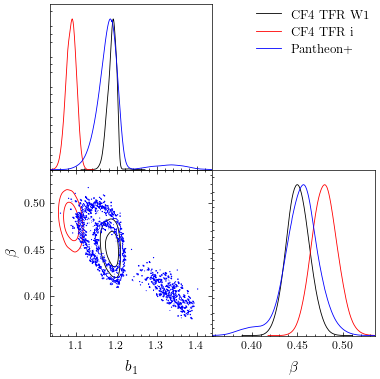

In [12]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_linear_from_beta_stochastic_eta_sampled.hdf5",
    "precomputed_los_Carrick2015_CF4_i_MNR_linear_from_beta_stochastic_eta_sampled.hdf5",
    "precomputed_los_Carrick2015_PantheonPlus_MNR_linear_from_beta_stochastic.hdf5",
    ]

labels = [
    "CF4 TFR W1",
    "CF4 TFR i",
    "Pantheon+"
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    labels=labels,
    # fontsize=18,
    filled=False,
    keys=["b1", "beta"],
    # filename="C15_full_posterior.pdf",
    )

In [4]:
beta2cosmo = candel.cosmo.Beta2Cosmology()

runs = [
    ("precomputed_los_Carrick2015_CF4_W1_MNR_linear_from_beta_stochastic_eta_sampled.hdf5", "CF4 TFR W1"),
    ("precomputed_los_Carrick2015_CF4_i_MNR_linear_from_beta_stochastic_eta_sampled.hdf5", "CF4 TFR i"),
    ("precomputed_los_Carrick2015_PantheonPlus_MNR_linear_from_beta_stochastic.hdf5", "Pantheon+"),
    ("precomputed_los_Carrick2015_SDSS_FP_noMNR_linear_from_beta_stochastic.hdf5", "SDSS FP")
]

filenames = [f[0] for f in runs]
labels = [f[1] for f in runs]

fnames = [join(root, f) for f in filenames]
S8_list = compute_S8_all(fnames, beta2cosmo)

Building SR interpolator: 100%|██████████| 100/100 [00:00<00:00, 127.79it/s]


CF4 TFR W1: 0.780 ± 0.034 | 1.395
CF4 TFR i: 0.826 ± 0.036 | 0.175
Pantheon+: 0.784 ± 0.043 | 1.058
SDSS FP: 0.804 ± 0.030 | 0.811


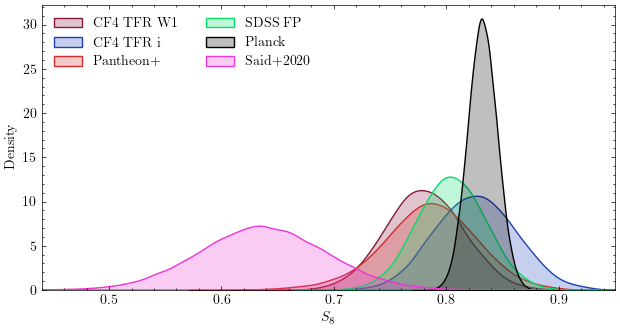

In [5]:
import posterior_agreement

bw = 0.2

planck_mean, planck_std = 0.832, 0.013
rng = np.random.default_rng(seed=42)
planck_samples = rng.normal(loc=planck_mean, scale=planck_std, size=100_000)

with plt.style.context("science"):
    plt.figure(figsize=(6.4, 3.5))

    # Plot KDEs for datasets
    i = 0
    for S8, label in zip(S8_list, labels):
        agreement_1d = posterior_agreement.compute_agreement((planck_samples, S8)).sigma
        print(f"{label}: {np.mean(S8):.3f} ± {np.std(S8):.3f} | {agreement_1d:.3f}")
        sns.kdeplot(S8, label=label, fill=True, color=COLS[i], bw_method=bw)
        i += 1

    # KDE for Planck
    sns.kdeplot(planck_samples, label="Planck", fill=True, color="k", bw_method=0.15)


    mu, std = 0.637, 0.056
    rng = np.random.default_rng(seed=42)
    x = rng.normal(loc=mu, scale=std, size=100_000)
    sns.kdeplot(x, label="Said+2020", fill=True, color=COLS[-1], bw_method=0.1, )
    plt.xlim(0.44, 0.95)

    plt.xlabel(r"$S_8$")
    plt.ylabel("Density")
    plt.legend(loc="upper left", ncols=2)
    plt.tight_layout()
    plt.savefig("/Users/rstiskalek/Downloads/S8_posterior.png", bbox_inches="tight", dpi=450)
    plt.show()